In [ ]:
from s2mosaic import mosaic
from pathlib import Path
import rasterio as rio
from matplotlib import pyplot as plt

We will start by making a mosaic using the visual TCI data

In [2]:
result = mosaic(
    grid_id="50HNG",
    start_year=2023,
    start_month=1,
    start_day=1,
    duration_months=1,
    output_dir=Path("output"),
    sort_method="valid_data",
    mosaic_method="first",
    required_bands=["visual"],
    no_data_threshold=0.001,
    additional_query={"eo:cloud_cover": {"lt": 50}},
)
print(f"Visual mosaic saved to: {result}")

Scenes: 0/8 | Mosaic currently contains 100.00% no data pixels

Visual mosaic saved to: output/50HNG_2023-01-01_to_2023-02-01_valid_data_first_visual.tif


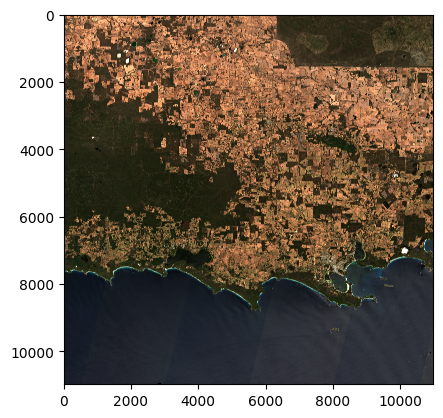

In [6]:
visual_array = rio.open(result).read()
plt.imshow(visual_array.transpose(1, 2, 0))

We can also make a mosaic using the raw bands, if you don's pass an output dir mosaic will return an array and rio profile

In [4]:
required_bands = ["B04", "B03", "B02", "B06", "B08", "B11"]

array, rio_profile = mosaic(
    grid_id="50HMH",
    start_year=2022,
    start_month=1,
    start_day=1,
    duration_months=2,
    sort_method="valid_data",
    mosaic_method="mean",
    required_bands=required_bands,
    no_data_threshold=0.001,
)

print(f"Mosaic array shape: {array.shape}, profile: {rio_profile}")

Scenes: 0/30 | Mosaic currently contains 100.00% no data pixels

Mosaic array shape: (6, 10980, 10980), profile: {'driver': 'GTiff', 'dtype': 'uint16', 'nodata': 0.0, 'width': 5490, 'height': 5490, 'count': 1, 'crs': CRS.from_wkt('PROJCS["WGS 84 / UTM zone 50S",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",117],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",10000000],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32750"]]'), 'transform': Affine(20.0, 0.0, 399960.0,
       0.0, -20.0, 6300040.0), 'blockxsize': 512, 'blockysize': 512, 'tiled': True, 'compress': 'deflate', 'interleave': 'band'}


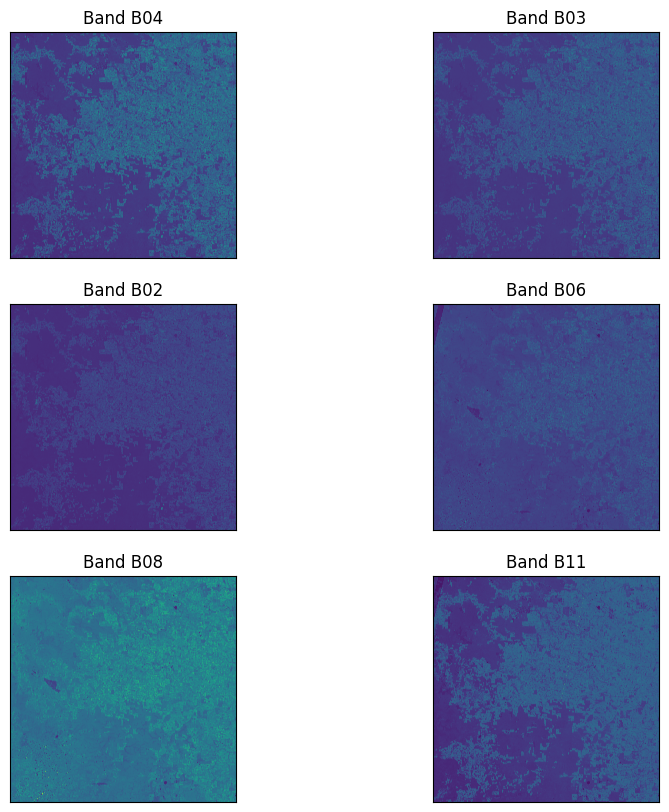

In [5]:
fig, axs = plt.subplots(3, 2, figsize=(10, 10))
for i, ax in enumerate(axs.flat):
    ax.imshow(array[i, :, :])
    ax.set_title(f"Band {required_bands[i]}")
    ax.set_xticks([])
    ax.set_yticks([])

We can also make a very high quality mosaic by using the percentile options combined with a larger time range and cloud filtering.

In [ ]:
array, rio_profile = mosaic(
    grid_id="50HNG",
    start_year=2023,
    start_month=1,
    start_day=1,
    duration_months=3,  # Use a longer duration to get more data
    sort_method="valid_data",
    mosaic_method="percentile",  # Use percentile method to mosaic
    percentile_value=25,  # Use 25th percentile to remove light clouds
    required_bands=["visual"],
    no_data_threshold=None,  # No threshold so process all images
    additional_query={"eo:cloud_cover": {"lt": 10}},  # Filter for low cloud cover
)


Scenes: 0/15 | Mosaic currently contains 100.00% no data pixels

Visual mosaic saved to: output/50HNG_2023-01-01_to_2023-02-01_valid_data_first_visual.tif


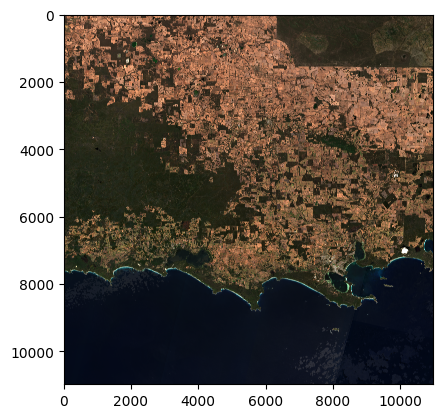

In [8]:
plt.imshow(array.transpose(1, 2, 0))